<a href="https://colab.research.google.com/github/yongminkim0501/Image_deep/blob/main/image_label_generate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/data_ai/

/content/drive/MyDrive/data_ai


In [ ]:
dataset_path = "/content/drive/MyDrive/data_ai/"
json_path = dataset_path + "019.data/1.Training/"
original_path = dataset_path + "019.data_original/"

In [ ]:
import json

with open(json_path+"BLD00001_PS3_K3A_NIA0276.json") as json_file:
  json_load = json.load(json_file)

print(json.dumps(json_load, indent='\t'))

{
	"type": "FeatureCollection",
	"features": [
		{
			"type": "Feature",
			"geometry": {
				"type": "Polygon",
				"coordinates": [
					[
						31.434703,
						30.041395,
						0.0
					],
					[
						31.440543,
						30.041465,
						0.0
					],
					[
						31.440463,
						30.046545,
						0.0
					],
					[
						31.434623,
						30.046476,
						0.0
					]
				]
			},
			"properties": {
				"object_imcoords": "EMPTY",
				"building_imcoords": "856.295264, 1000.804698, 828.008311, 1024.000000, 879.970214, 1023.864715, 878.740347, 1015.25564",
				"road_imcoords": "EMPTY",
				"image_id": "BLD00001_PS3_K3A_NIA0276.png",
				"ingest_time": "2023-03-02T14:34:14.313313Z",
				"type_id": "1",
				"type_name": "\uac74\ubb3c"
			}
		},
		{
			"type": "Feature",
			"geometry": {
				"type": "Polygon",
				"coordinates": [
					[
						31.434703,
						30.041395,
						0.0
					],
					[
						31.440543,
						30.041465,
						0.0
					],
					[
						31.440463,
						30.046545,
						

In [ ]:
import cv2

img = cv2.imread("/content/drive/MyDrive/data_ai/019.data_original/BLD00001_PS3_K3A_NIA0276.png")
img = cv2.resize(img, (256,256))

697.565715, 727.686315, 690.491938, 745.256665, 691.861056, 757.350542, 719.015233, 770.357165, 729.968179, 776.518197, 740.921124, 762.142456, 753.243188, 736.129211, 751.189511, 728.142688, 744.041289, 720.778640, 732.046486, 718.052548, 722.959513, 727.321260, 708.965576, 720.960379, 703.513393, 725.86734
26
[[697.565715, 727.686315], [690.491938, 745.256665], [691.861056, 757.350542], [719.015233, 770.357165], [729.968179, 776.518197], [740.921124, 762.142456], [753.243188, 736.129211], [751.189511, 728.142688], [744.041289, 720.77864], [732.046486, 718.052548], [722.959513, 727.32126], [708.965576, 720.960379], [703.513393, 725.86734]]
[[697 727]
 [690 745]
 [691 757]
 [719 770]
 [729 776]
 [740 762]
 [753 736]
 [751 728]
 [744 720]
 [732 718]
 [722 727]
 [708 720]
 [703 725]]


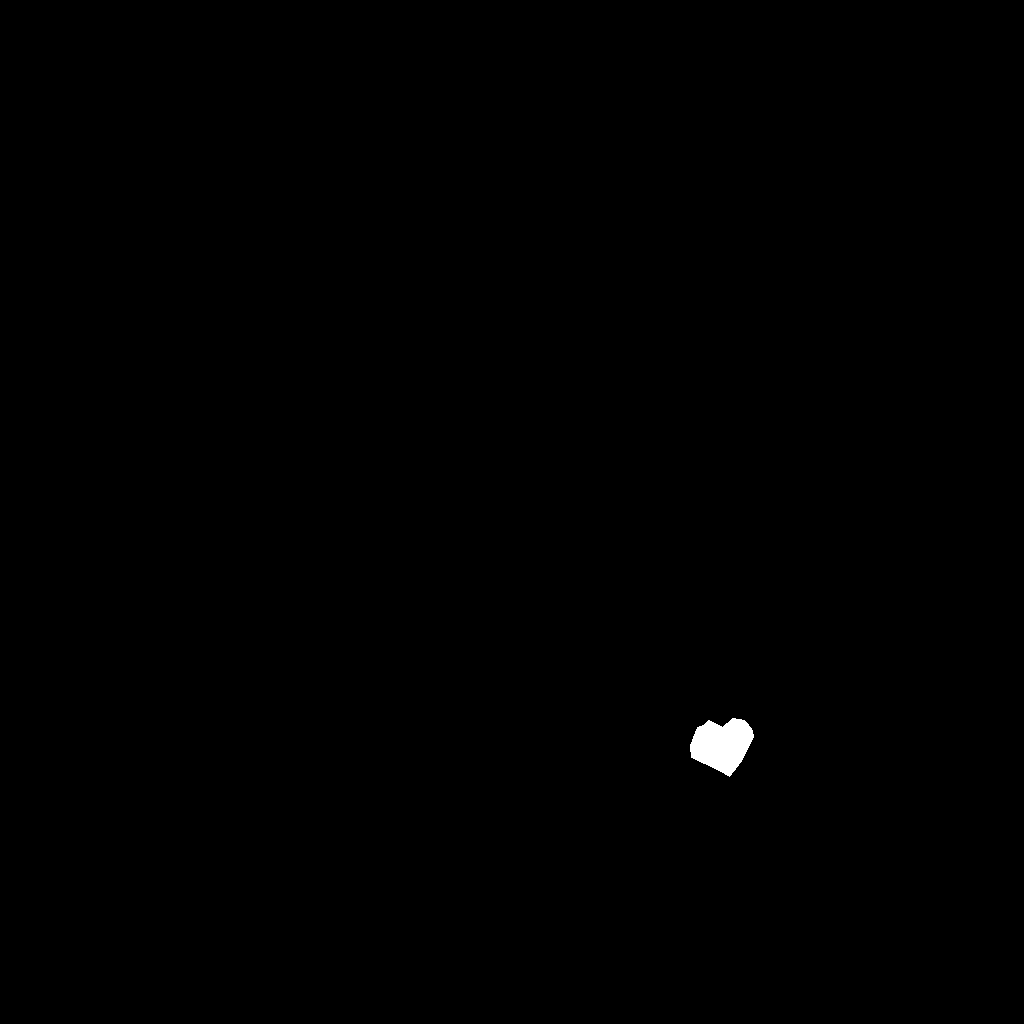

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow

label = np.zeros((256,256), np.uint8)
pts1 = []
pts2 = []
json_load["features"][0]["geometry"]["coordinates"]

for i in range(0,3):
    vvv = []
    for j in range(0,3):
      vvv.append(int(json_load["features"][0]["geometry"]["coordinates"][i][j]))
    vvv.pop()
    pts1.append(vvv)
# size = 1024 1024 -> 나중에 타입 맞추기

vv = json_load["features"][50]["properties"]["building_imcoords"]
print(vv)
a = vv.split(", ")
print(len(a))
pts = []
for i in range(0,int(len(a)/2)):
  vvv = []
  vvv.append(float(a[2*i]))
  vvv.append(float(a[2*i+1]))
  pts.append(vvv)
print(pts)
for i in range(0,int(len(a)/2)):
  for j in range(2):
    pts[i][j] = int(pts[i][j])
pts = np.array(pts)
print(pts)
#vvv = np.array(vvv)
pts2 = np.array(pts2)

img = np.zeros((1024, 1024, 3), np.uint8)

img = cv2.fillPoly(img, [pts],(255,255,255))
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

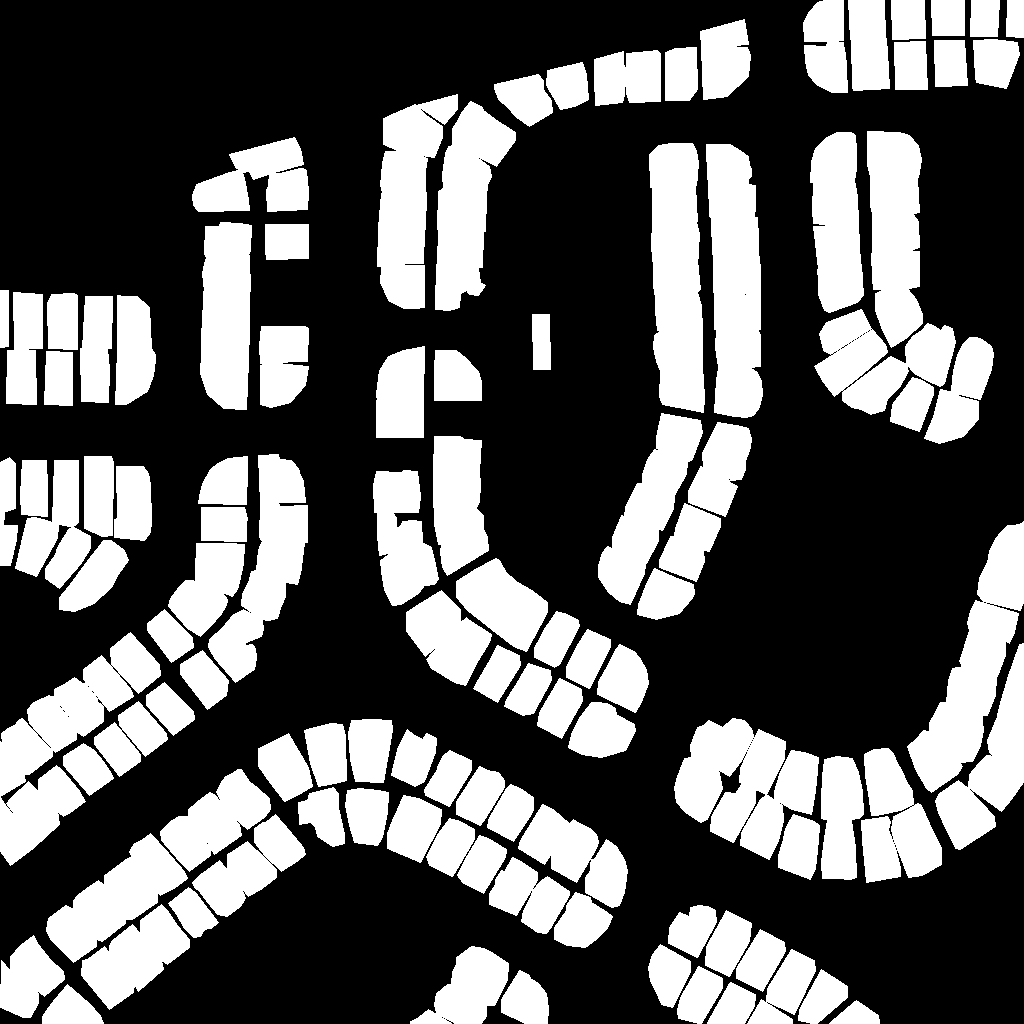

In [ ]:
img = np.zeros((1024, 1024, 3), np.uint8)
count = 0

for number in range(len(json_load["features"])):
  vv = json_load["features"][number]["properties"]["building_imcoords"]
  a = vv.split(", ")

  pts = []
  for i in range(0,int(len(a)/2)):
    vvv = []
    vvv.append(float(a[2*i]))
    vvv.append(float(a[2*i+1]))
    pts.append(vvv)

  for i in range(0,int(len(a)/2)):
    for j in range(2):
      pts[i][j] = int(pts[i][j])
  pts = np.array(pts)

  img = cv2.fillPoly(img, [pts],(255,255,255))
data_name = f"img_{count}"

cv2.imwrite(f'/content/drive/MyDrive/data_ai/019.data/1.Training/label_data/{data_name}.png', img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
cd /content/drive/MyDrive/data_ai

/content/drive/MyDrive/data_ai


In [ ]:
import pandas as pd
train_csv = pd.read_csv("list_building_pub4_modi.csv", header = None)
train_data = train_csv.iloc[:, 0].tolist()
print(train_data)
# for i in range(5):
#   #print(json_path + train_csv_head[i] + ".json")

['BLD00001_PS3_K3A_NIA0276', 'BLD00002_PS3_K3A_NIA0276', 'BLD00004_PS3_K3A_NIA0276', 'BLD00006_PS3_K3A_NIA0276', 'BLD00007_PS3_K3A_NIA0276', 'BLD00008_PS3_K3A_NIA0276', 'BLD00010_PS3_K3A_NIA0276', 'BLD00011_PS3_K3A_NIA0276', 'BLD00013_PS3_K3A_NIA0276', 'BLD00017_PS3_K3A_NIA0276', 'BLD00018_PS3_K3A_NIA0276', 'BLD00024_PS3_K3A_NIA0276', 'BLD00029_PS3_K3A_NIA0276', 'BLD00030_PS3_K3A_NIA0276', 'BLD00031_PS3_K3A_NIA0276', 'BLD00032_PS3_K3A_NIA0276', 'BLD00033_PS3_K3A_NIA0276', 'BLD00034_PS3_K3A_NIA0276', 'BLD00038_PS3_K3A_NIA0276', 'BLD00039_PS3_K3A_NIA0276', 'BLD00044_PS3_K3A_NIA0276', 'BLD00047_PS3_K3A_NIA0276', 'BLD00048_PS3_K3A_NIA0276', 'BLD00049_PS3_K3A_NIA0276', 'BLD00051_PS3_K3A_NIA0276', 'BLD00052_PS3_K3A_NIA0276', 'BLD00053_PS3_K3A_NIA0276', 'BLD00054_PS3_K3A_NIA0276', 'BLD00056_PS3_K3A_NIA0276', 'BLD00057_PS3_K3A_NIA0276', 'BLD00058_PS3_K3A_NIA0276', 'BLD00061_PS3_K3A_NIA0276', 'BLD00074_PS3_K3A_NIA0276', 'BLD00075_PS3_K3A_NIA0276', 'BLD00076_PS3_K3A_NIA0276', 'BLD00077_PS3_K3A_N

In [ ]:
# import cv2

# img = cv2.imread("/content/drive/MyDrive/data_ai/019.data_original/BLD00001_PS3_K3A_NIA0276.png")
# img = cv2.resize(img, (256,256))

# img_data = []
# for dic in train_data:
#   img = cv2.imread("/content/drive/MyDrive/data_ai/019.data_original/"+ dic + ".png")
#   img_data.append(img)

In [ ]:
import json
from google.colab.patches import cv2_imshow
import numpy as np

import pandas as pd
train_csv = pd.read_csv("list_building_pub4_modi.csv", header = None)
train_data = train_csv.iloc[:, 0]

print(train_data[0])

for i in range(5):
  print(json_path + train_data[i] + ".json")

json_load_1 = []
for i in range(4):
  with open(json_path + train_data[i] + ".json") as json_file:
    json_load_1.append(json.load(json_file))
json_load = json_load_1[0]
q = json_load
pts = []
gts = []
for key in q.keys() :
  if key == 'features':
    d = q[key][0]
    for key in d.keys():
      if key == 'geometry':
        s = d[key]
        for key in s.keys():
          a = s['coordinates']
          for i in range(3):
            geo = []
            for j in range(len(a[i])):
              geo.append(a[i][j])
            pts.append(geo)
    t = q['features'][1]
    for key in t.keys():
      if key == 'properties':
        s = d[key]
        for key in s.keys():
          if key == 'building_imcoords':
            a = s[key]
            a = a.split(", ")
            for i in range(len(a)):
              gts.append(float(a[i]))
            for i in range(len(gts)):
              gts[i] = int(gts[i])
pts = np.array(pts)
gts = np.array(gts)

print(pts)
print(gts)

BLD00001_PS3_K3A_NIA0276
/content/drive/MyDrive/data_ai/019.data/1.Training/BLD00001_PS3_K3A_NIA0276.json
/content/drive/MyDrive/data_ai/019.data/1.Training/BLD00002_PS3_K3A_NIA0276.json
/content/drive/MyDrive/data_ai/019.data/1.Training/BLD00004_PS3_K3A_NIA0276.json
/content/drive/MyDrive/data_ai/019.data/1.Training/BLD00006_PS3_K3A_NIA0276.json
/content/drive/MyDrive/data_ai/019.data/1.Training/BLD00007_PS3_K3A_NIA0276.json
[[31.434703 30.041395  0.      ]
 [31.440543 30.041465  0.      ]
 [31.440463 30.046545  0.      ]
 [31.434703 30.041395  0.      ]
 [31.440543 30.041465  0.      ]
 [31.440463 30.046545  0.      ]]
[ 856 1000  828 1024  879 1023  878 1015]


In [ ]:
import os
dataset_path = "/content/drive/MyDrive/data_ai/"
png_list = os.listdir("/content/drive/MyDrive/data_ai/019.data_original")

for i in range (len(png_list)):
  png_list[i] = png_list[i].split(".")

png_t = []
for i in range (len(png_list)):
  if png_list[i][1] == 'png':
    png_t.append(png_list[i][0])

['BLD00217_PS3_K3A_NIA0276.json', 'BLD00284_PS3_K3A_NIA0276.json', 'BLD00074_PS3_K3A_NIA0276.json', 'BLD00281_PS3_K3A_NIA0276.json', 'BLD00267_PS3_K3A_NIA0276.json', 'BLD00222_PS3_K3A_NIA0276.json', 'BLD00039_PS3_K3A_NIA0276.json', 'BLD00128_PS3_K3A_NIA0276.json', 'BLD00057_PS3_K3A_NIA0276.json', 'BLD00078_PS3_K3A_NIA0276.json', 'BLD00209_PS3_K3A_NIA0276.json', 'BLD00011_PS3_K3A_NIA0276.json', 'BLD00269_PS3_K3A_NIA0276.json', 'BLD00262_PS3_K3A_NIA0276.json', 'BLD00186_PS3_K3A_NIA0276.json', 'BLD00271_PS3_K3A_NIA0276.json', 'BLD00151_PS3_K3A_NIA0276.json', 'BLD00038_PS3_K3A_NIA0276.json', 'BLD00053_PS3_K3A_NIA0276.json', 'BLD00205_PS3_K3A_NIA0276.json', 'BLD00006_PS3_K3A_NIA0276.json', 'BLD00017_PS3_K3A_NIA0276.json', 'BLD00079_PS3_K3A_NIA0276.json', 'BLD00207_PS3_K3A_NIA0276.json', 'BLD00008_PS3_K3A_NIA0276.json', 'BLD00297_PS3_K3A_NIA0276.json', 'BLD00264_PS3_K3A_NIA0276.json', 'BLD00253_PS3_K3A_NIA0276.json', 'BLD00172_PS3_K3A_NIA0276.json', 'BLD00176_PS3_K3A_NIA0276.json', 'BLD00106

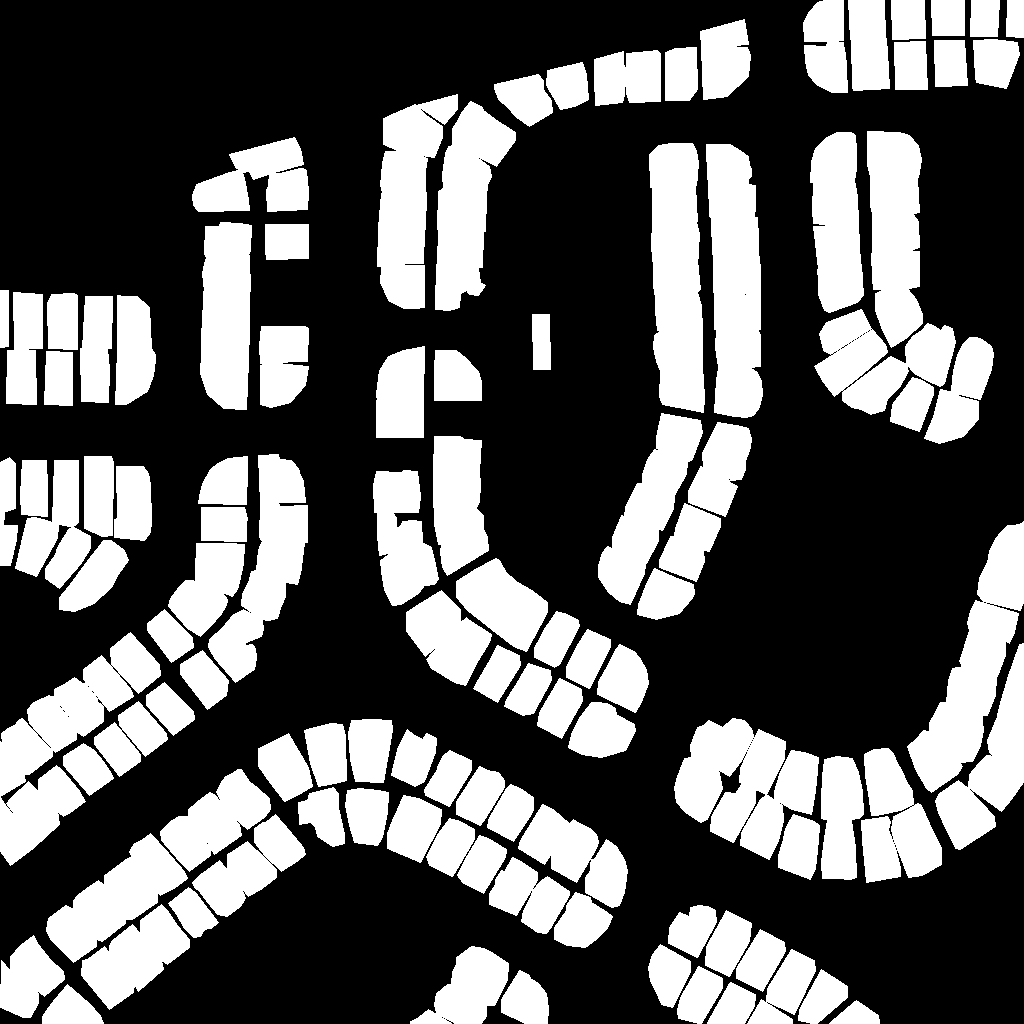

In [ ]:
import json
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import cv2
import json

json_load1 = []
img1 = []

import os
dataset_path = "/content/drive/MyDrive/data_ai/"
png_list = os.listdir("/content/drive/MyDrive/data_ai/019.data/1.Training/")


for i in range (len(png_list)):
  png_list[i] = png_list[i].split(".")

png_t = []
for i in range (len(png_list)):
  if len(png_list[i]) == 2 and png_list[i][1] == 'json':
    png_t.append(png_list[i][0])

for item in png_t:
  img = np.zeros((1024, 1024, 3), np.uint8)
  with open(json_path+f"{item}.json") as json_file:
    try:
      json_load = json.load(json_file)
      json.dumps(json_load, indent='\t')
    except Exception as e:
      print(item)
      print(json_load)
      print(f'에러는 {e}')
  for number in range(len(json_load["features"])):
    vv = json_load["features"][number]["properties"]["building_imcoords"]
    a = vv.split(", ")

    pts = []
    for i in range(0,int(len(a)/2)):
      vvv = []
      vvv.append(float(a[2*i]))
      vvv.append(float(a[2*i+1]))
      pts.append(vvv)

    for i in range(0,int(len(a)/2)):
      for j in range(2):
        pts[i][j] = int(pts[i][j])
    pts = np.array(pts)
    img = cv2.fillPoly(img, [pts],(255,255,255))
  cv2.imwrite(f'/content/drive/MyDrive/data_ai/019.data/1.Training/label_data/{item}.png', img)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
#img1은 생성한 label image를 저장한 파일
import os
dataset_path = "/content/drive/MyDrive/data_ai/"
png_list = os.listdir("/content/drive/MyDrive/data_ai/019.data_original")

for i in range (len(png_list)):
  png_list[i] = png_list[i].split(".")

png_t = []
png_path = []

for i in range (len(png_list)):
  if png_list[i][1] == 'png':
    png_path.append(png_list[i][0]+"."+png_list[i][1])
    png_t.append(png_list[i][0])

img_list = []

for path in png_t:
  img = cv2.imread(f"/content/drive/MyDrive/data_ai/019.data_original/{path}.png")
  img.resize((224,224))
  img_list.append(img)

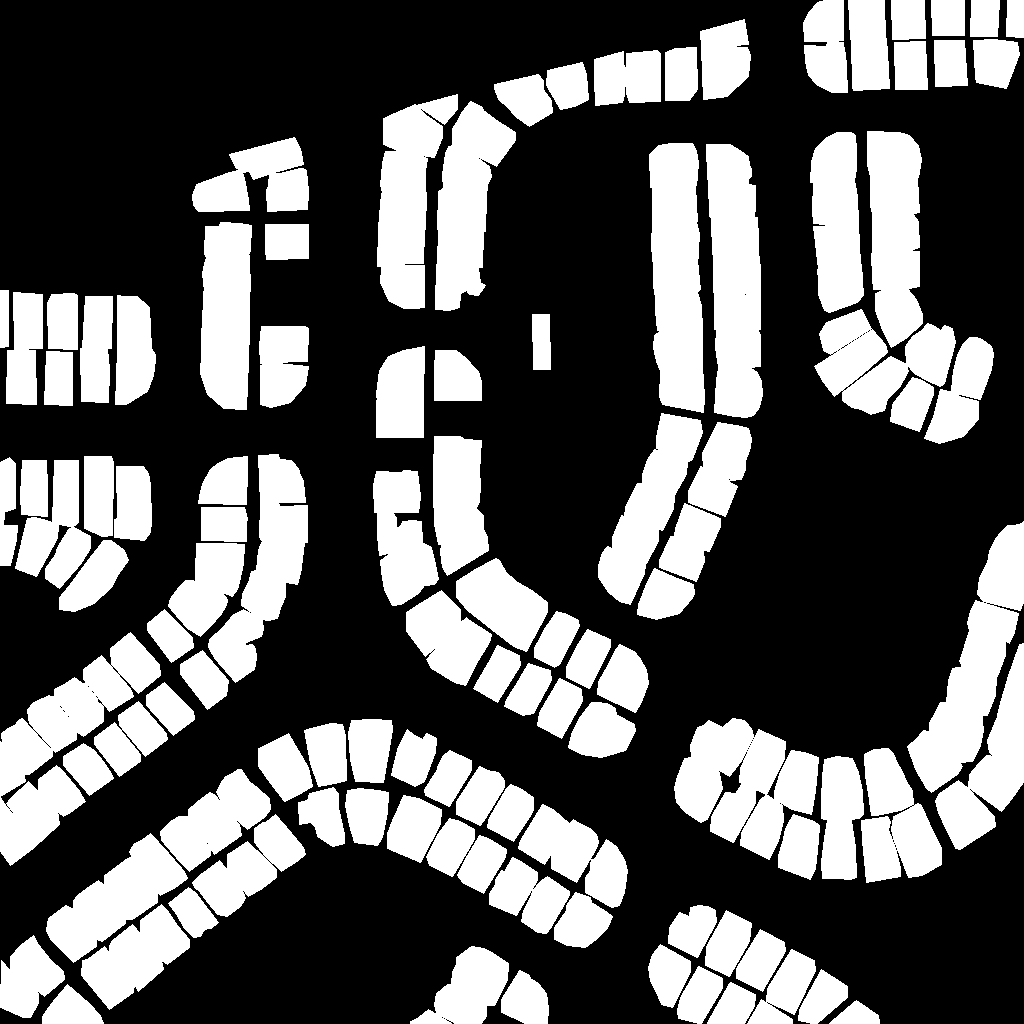

In [ ]:
import json
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import cv2
import json

json_load1 = []
img1 = []

import os
dataset_path = "/content/drive/MyDrive/data_ai/"
png_list = os.listdir("/content/drive/MyDrive/data_ai/019.data/1.Training/")

for i in range (len(png_list)):
  png_list[i] = png_list[i].split(".")

png_t = []
for i in range (len(png_list)):
  if len(png_list[i]) == 2 and png_list[i][1] == 'json':
    png_t.append(png_list[i][0])

for item in png_t:
  img = np.zeros((1024, 1024, 3), np.uint8)

  with open(json_path+f"{item}.json") as json_file:
    json_load = json.load(json_file)
    json.dumps(json_load, indent='\t')
  for number in range(len(json_load["features"])):
    vv = json_load["features"][number]["properties"]["building_imcoords"]
    a = vv.split(", ")

    pts = []
    for i in range(0,int(len(a)/2)):
      vvv = []
      vvv.append(float(a[2*i]))
      vvv.append(float(a[2*i+1]))
      pts.append(vvv)

    for i in range(0,int(len(a)/2)):
      for j in range(2):
        pts[i][j] = int(pts[i][j])
    pts = np.array(pts)
    img = cv2.fillPoly(img, [pts],(255,255,255))
  cv2.imwrite(f'/content/drive/MyDrive/data_ai/019.data/1.Training/label_data/{item}.png', img)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import json
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import cv2
import json

json_load1 = []
img1 = []

import os
dataset_path = "/content/drive/MyDrive/data_ai/"
png_list = os.listdir("/content/drive/MyDrive/data_ai/019.data/1.Training")

for i in range (len(png_list)):
  png_list[i] = png_list[i].split(".")

for i in range (len(png_list)):
  if len(png_list[i]) == 2 and png_list[i][1] == 'json':
    png_t.append(png_list[i][0])
for item in png_t:
  img = cv2.imread(f"/content/drive/MyDrive/data_ai/019.data_original/{item}.png")
  img = cv2.resize(img, (1024,1024))

#  img = np.zeros((1024, 1024, 3), np.uint8)
  with open(json_path+f"{item}.json") as json_file:
    json_load = json.load(json_file)
    json.dumps(json_load, indent='\t')
  for number in range(len(json_load["features"])):
    vv = json_load["features"][number]["properties"]["building_imcoords"]
    a = vv.split(", ")

    pts = []
    for i in range(0,int(len(a)/2)):
      vvv = []
      vvv.append(float(a[2*i]))
      vvv.append(float(a[2*i+1]))
      pts.append(vvv)

    for i in range(0,int(len(a)/2)):
      for j in range(2):
        pts[i][j] = int(pts[i][j])
    pts = np.array(pts)
    img = cv2.fillPoly(img, [pts],(255,255,255))
  cv2.imwrite(f'/content/drive/MyDrive/data_ai/019.data/1.Training/label_data_in_picture/{item}.png', img)

# cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
import matplotlib.pyplot as plt
import cv2
label_image_black_white = []
label_origin_image = []

for name in png_t:
  img = cv2.imread(f"/content/drive/MyDrive/data_ai/019.data/1.Training/label_data/{name}.png", cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (256, 256))
  label_image_black_white.append(img)

  img = cv2.imread(f"/content/drive/MyDrive/data_ai/019.data_original/{name}.png")
  img = cv2.resize(img, (256, 256))
  label_origin_image.append(img)

print(len(label_image_black_white))
print(len(label_origin_image))
print(img)

# fig, axs = plt.subplots(100, 2, figsize=(10, 15))
# plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0.1, wspace=0)
# for i in range(len(label_image_black_white)):
#   axs[i][0].imshow(label_image_black_white[i], cmap='gray')
#   axs[i][0].axis('off')
#   axs[i][0].set_title("gray label img")

#   axs[i][1].imshow(label_origin_image[i])
#   axs[i][1].axis('off')
#   axs[i][1].set_title("original label img")

# plt.show()

99
99
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [148 170 185]
  [164 186 201]
  [167 192 208]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [150 169 183]
  [166 187 203]
  [157 179 196]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [151 172 186]
  [153 174 191]
  [156 181 198]]

 ...

 [[ 91 114 136]
  [ 86 111 132]
  [100 121 141]
  ...
  [ 63  58  58]
  [ 63  59  63]
  [101 106 111]]

 [[103 115 134]
  [ 93 118 141]
  [ 97 122 147]
  ...
  [ 60  59  62]
  [107 108 111]
  [ 82  90  97]]

 [[ 99 107 124]
  [ 85 103 124]
  [ 98 122 146]
  ...
  [ 67  68  72]
  [ 91  98 103]
  [ 67  72  80]]]


In [ ]:
x_test = []
x_train = []

y_test = []
y_train = []
import os
dataset_path = "/content/drive/MyDrive/data_ai/"
png_list = os.listdir("/content/drive/MyDrive/data_ai/019.data/1.Training/")
for i in range (len(png_list)):
  png_list[i] = png_list[i].split(".")
png_t = []
for i in range (len(png_list)):
  if len(png_list[i]) == 2 and png_list[i][1] == 'json':
    png_t.append(png_list[i][0])

for i in range(0, len(png_t)-30):
  x_train.append(label_origin_image[i])
  y_train.append(label_image_black_white[i])
for i in range(len(png_t)-30, len(png_t)):
  x_test.append(label_origin_image[i])
  y_test.append(label_image_black_white[i])



In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model

def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet(input_shape):
    size = 8      # ORiginal: 16
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, size * 4)
    s2, p2 = encoder_block(p1, size * 8)
    s3, p3 = encoder_block(p2, size * 16)
    s4, p4 = encoder_block(p3, size * 32)

    b1 = conv_block(p4, size * 64)    # Original is 1024

    d1 = decoder_block(b1, s4, size * 32)
    d2 = decoder_block(d1, s3, size * 16)
    d3 = decoder_block(d2, s2, size * 8)
    d4 = decoder_block(d3, s1, size * 4)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="U-Net")
    return model

In [ ]:
import tensorflow as tf

x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = x_train.astype(np.float32)
x_train /= 255.0
x_test = np.array(x_test)
y_test = np.array(y_test)

# normalize

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

model = build_unet((256, 256, 3))
model.compile(optimizer='adam',
          loss=tf.losses.BinaryCrossentropy(),
          metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)


(69, 256, 256, 3) (69, 256, 256)
(30, 256, 256, 3) (30, 256, 256)
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step - accuracy: 0.5410 - loss: -23.3690 - val_accuracy: 3.6112e-05 - val_loss: -752.6212
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 424ms/step - accuracy: 0.6122 - loss: -163.5513 - val_accuracy: 0.0000e+00 - val_loss: -755.7958
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 437ms/step - accuracy: 0.6453 - loss: -232.9001 - val_accuracy: 3.9673e-05 - val_loss: -755.8615
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 424ms/step - accuracy: 0.6393 - loss: -255.3596 - val_accuracy: 0.0018 - val_loss: -755.8876
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 423ms/step - accuracy: 0.6159 - loss: -277.6928 - val_accuracy: 0.0031 - val_loss: -755.8904
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 432ms/step - accuracy: 0.6348 - loss: -286.3578 - val_accuracy: 5.4169e-04 - val_loss: -755.8522
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 426ms/step - accuracy: 0.6421 - loss: -293.9842 - val_accuracy: 0.0030 - val_loss: -755.8